# Signature Verification using Siamese Networks and Amazon Sagemaker


### Few short learning with Siamese Networks
This notebook tries to classify images using Siamese Networks proposed by **Gregory et. al**, in his paper [Siamese Neural Networks for One-shot Image Recognition](http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf), to solve the **One shot learning** problem.

This notebook uses a deep convolutional neural network (CNN) to extract features from input images. Keras is used for implementing the CNN.

### Few shot learning

One of the main requisites of highly accurate deep learning models is large amount of data. The set of hyperparameters a Deep Model need to be tuned are very large, and the amount of data needed to get the right set of value for these hyperparameters is also large.

But what if we need an automated system, which can successfully classify images to various classes given the data for each image class is quite less.

**Few shot learning** is such a problem. We can **Few shot learning** as a problem to classify data into K classes where each class has only few examples. The paper written by [Gregory et. al](http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf), suggest ideas for building a Neural Network Architecture to solve this problem.



## Siamese networks 

Siamese networkis a Deep Nueral Network architecture proposed by **Gregory et. al** in his paper [Siamese Neural Networks for One-shot Image Recognition](http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf), the paper proposes an architecture where using Convolutional Nueral Networks one can tackle the problem of One Shot Learning.

The model aims to solve the basic problem of image verification, given that we have very few samples of image of each class or category

The models aims to learn the embeddings of 2 separate images fed into the Nueral Network, the two embeddings are used to calculate the L1 distance between the 2 embeddings. Once the distance embedding metric is calculated, the embedding is fed into a sigmoid unit which by the magic of back propogation, learns the correct set of hyperparameters to carry out the image verification.

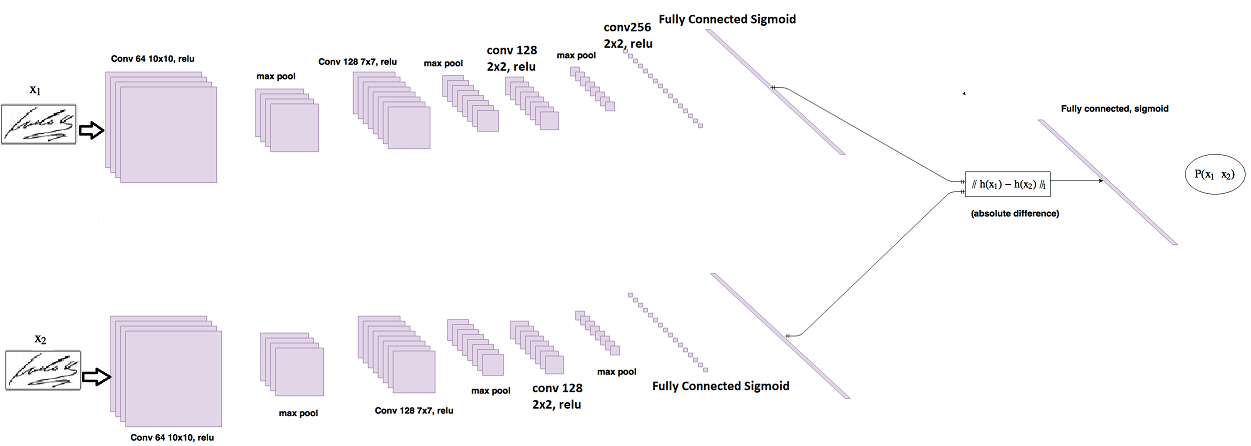

In [1]:
!pip install -U sagemaker

     |████████████████████████████████| 309 kB 6.9 MB/s eta 0:00:01
  Created wheel for sagemaker: filename=sagemaker-2.16.3.post0-py2.py3-none-any.whl size=435625 sha256=4ef832b6ff922d11bd2f83fe321d2b9c2e138f19bdc6c8e18fc9452bace92dc8
  Stored in directory: /home/ec2-user/.cache/pip/wheels/3f/df/58/e6ee30de7e4d3d8ba523922b930ddef32c41b03c66ceaf7ef0
Successfully built sagemaker
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.16.3
    Uninstalling sagemaker-2.16.3:
      Successfully uninstalled sagemaker-2.16.3
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
import os
import sagemaker
from sagemaker import get_execution_role
import tensorflow as tf

sagemaker_session = sagemaker.Session()

role = get_execution_role()
region = sagemaker_session.boto_session.region_name
print(role)


arn:aws:iam::072851894905:role/Sage_FullAccess


## Train locally

In [3]:

!/bin/bash ./setup.sh

The user has root access.
SageMaker instance route table setup is ok. We are good to go.
SageMaker instance routing for Docker is ok. We are good to go!


In [10]:
from sagemaker.tensorflow import TensorFlow
data_dir = '../data/model_train/'
TF_estimator_local = TensorFlow(entry_point='train.py',
                                 role=role,
                                 train_instance_count=1,
                                 train_instance_type='local',
                                 framework_version='2.1.0',
                                 py_version='py3',
                                 script_mode=True
                                 )


train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [11]:
TF_estimator_local.fit({"train": f'file://{data_dir}' , 
                         })

Creating tmpxp5o4pu1_algo-1-yvb0t_1 ... 
Attaching to tmpxp5o4pu1_algo-1-yvb0t_12mdone
algo-1-yvb0t_1  | 2020-11-18 04:59:28,692 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
algo-1-yvb0t_1  | 2020-11-18 04:59:28,701 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-yvb0t_1  | 2020-11-18 04:59:29,886 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-yvb0t_1  | 2020-11-18 04:59:29,907 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-yvb0t_1  | 2020-11-18 04:59:29,924 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
algo-1-yvb0t_1  | 2020-11-18 04:59:29,933 sagemaker-containers INFO     Invoking user script
algo-1-yvb0t_1  | 
algo-1-yvb0t_1  | Training Env:
algo-1-yvb0t_1  | 
algo-1-yvb0t_1  | {
algo-1-yvb0t_1  |     "additional_framework_parameters": {},
algo-1-yvb0t_1  |     "channel_input_dirs": {
algo-1-yvb0t_1  

algo-1-yvb0t_1  | Train on 1938 samples, validate on 647 samples
algo-1-yvb0t_1  | Epoch 1/32
1938/1938 [==============================] - 35s 18ms/sample - loss: 2.8155 - accuracy: 0.7312 - val_loss: 1.7857 - val_accuracy: 0.8903
algo-1-yvb0t_1  | Epoch 2/32
1938/1938 [==============================] - 33s 17ms/sample - loss: 1.3908 - accuracy: 0.8953 - val_loss: 1.0433 - val_accuracy: 0.9227
algo-1-yvb0t_1  | Epoch 3/32
1938/1938 [==============================] - 33s 17ms/sample - loss: 0.9092 - accuracy: 0.9004 - val_loss: 0.7420 - val_accuracy: 0.9289
algo-1-yvb0t_1  | Epoch 4/32
1938/1938 [==============================] - 32s 16ms/sample - loss: 0.6487 - accuracy: 0.9138 - val_loss: 0.6408 - val_accuracy: 0.9073
algo-1-yvb0t_1  | Epoch 5/32
1938/1938 [==============================] - 33s 17ms/sample - loss: 0.5400 - accuracy: 0.9087 - val_loss: 0.4561 - val_accuracy: 0.9351
algo-1-yvb0t_1  | Epoch 6/32
1938/1938 [==============================] - 33s 17ms/sample - loss: 0.4182 

In [44]:
##Input pkl file

pklfile = '../data/model_train/model_data_pre_processed.pkl'

In [47]:
##Copy it to s3
#!aws s3 sync ../data/model_train s3://sagemaker-chakra1/siamese/model_train
!aws s3 cp {pklfile} s3://sagemaker-chakra1/siamese/model_train1/

upload: ../data/model_train/model_data_pre_processed.pkl to s3://sagemaker-chakra1/siamese/model_train1/model_data_pre_processed.pkl


## Train with Sagemaker

In [69]:
from sagemaker.tensorflow import TensorFlow
dir1 = 's3://sagemaker-chakra1/siamese/'
train_dir = dir1+"model_train1"
output_dir = dir1+"output"

TF_estimator = TensorFlow(entry_point='train.py',
                                 role=role,
                                 train_instance_count=1,
                                 train_instance_type='ml.p2.xlarge',
                                 framework_version='2.1.0',
                                 py_version='py3',
                                 script_mode=True,
                                 output_path=output_dir
                                 )


train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [ ]:
TF_estimator.fit({"train": train_dir})

2020-11-18 10:00:20 Starting - Starting the training job...
2020-11-18 10:00:22 Starting - Launching requested ML instances......
2020-11-18 10:01:44 Starting - Preparing the instances for training..................
2020-11-18 10:04:51 Downloading - Downloading input data
2020-11-18 10:04:51 Training - Downloading the training image...........2020-11-18 10:06:28,381 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
2020-11-18 10:06:28,873 sagemaker-containers INFO     Invoking user script

Training Env:

{
    "additional_framework_parameters": {},
    "channel_input_dirs": {
        "train": "/opt/ml/input/data/train"
    },
    "current_host": "algo-1",
    "framework_module": "sagemaker_tensorflow_container.training:main",
    "hosts": [
        "algo-1"
    ],
    "hyperparameters": {
        "model_dir": "s3://sagemaker-chakra1/siamese/output/tensorflow-training-2020-11-18-10-00-20-257/model"
    },
    "input_config_dir": "/opt/ml/input/conf

#015  16/1938 [..............................] - ETA: 10s - loss: 2.6982 - accuracy: 0.8125#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 2.7508 - accuracy: 0.7188#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 2.6995 - accuracy: 0.7292#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 1.9917 - accuracy: 0.8125#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 1.9307 - accuracy: 0.9062#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 1.8956 - accuracy: 0.9167#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 1.6082 - accuracy: 0.8750#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 1.6389 - accuracy: 0.8750#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 1.5867 - accuracy: 0.8958#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 1.2910 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 1.2768 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 1.3251 - accuracy: 0.9792#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 1.1350 - accuracy: 0.8750#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 1.1173 - accuracy: 0.9062#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 1.1284 - accuracy: 0.9167#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.9950 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.9849 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.9962 - accuracy: 0.9792#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.8400 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.8405 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.8663 - accuracy: 0.9792#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.7200 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.7169 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.7257 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.6712 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.6557 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.6721 - accuracy: 0.9792#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.5898 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.6099 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.6302 - accuracy: 0.9792#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.4987 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.4879 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.4808 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.4198 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.4195 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.4211 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.4055 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.5193 - accuracy: 0.9688#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.4985 - accuracy: 0.9792#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.3461 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.3744 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.3675 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.4263 - accuracy: 0.9375#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.4448 - accuracy: 0.9375#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.4262 - accuracy: 0.9583#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.3348 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.3291 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.3346 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.2983 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.2954 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.3148 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.2680 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.2644 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.2625 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.2334 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.2342 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.2335 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.2098 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.2096 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.2093 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.1892 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.1890 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.1888 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.1663 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.1665 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.1663 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.1485 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.1479 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.1481 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 11s - loss: 0.1314 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 11s - loss: 0.1310 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 11s - loss: 0.1307 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.1150 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.1150 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.1149 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.1013 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.1015 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.1013 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.2471 - accuracy: 0.9375#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.3092 - accuracy: 0.9062#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.3103 - accuracy: 0.9167#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.2132 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.2008 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.1924 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.1579 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.1608 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.1602 - accuracy: 1.0000#010#010#010#010#010#010#010#01

#015  16/1938 [..............................] - ETA: 10s - loss: 0.1339 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  32/1938 [..............................] - ETA: 10s - loss: 0.1323 - accuracy: 1.0000#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#010#015  48/1938 [..............................] - ETA: 10s - loss: 0.1369 - accuracy: 1.0000#010#010#010#010#010#010#010#01

2020-11-18 10:12:55.133885: W tensorflow/python/util/util.cc:319] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
INFO:tensorflow:Assets written to: /opt/ml/model/siamese/1/assets
INFO:tensorflow:Assets written to: /opt/ml/model/siamese/1/assets
[2020-11-18 10:12:57.302 ip-10-0-140-28.us-east-2.compute.internal:24 INFO utils.py:25] The end of training job file will not be written for jobs running under SageMaker.
2020-11-18 10:12:58,278 sagemaker-containers INFO     Reporting training SUCCESS

2020-11-18 10:12:58 Uploading - Uploading generated training model
2020-11-18 10:14:12 Completed - Training job completed
Training seconds: 580
Billable seconds: 580


## Deploy Endpoint

In [ ]:
predictor = TF_estimator.deploy(1, 'ml.c5.xlarge')

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


---------------!

## Inference - Signature Verification

In [80]:
import cv2
import matplotlib.pyplot as plt

def morph(inp):
    image = cv2.imread(inp)
    result = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=1)
    close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    boxes = []
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        boxes.append([x,y, x+w,y+h])
    boxes = np.asarray(boxes)
    left = np.min(boxes[:,0])
    top = np.min(boxes[:,1])
    right = np.max(boxes[:,2])
    bottom = np.max(boxes[:,3])

    result[close==0] = (255,255,255)
    ROI = result[top:bottom, left:right].copy()
    ROI = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)

    #cv2.imwrite('ROI.jpg', ROI)
    retval, thresh_crop = cv2.threshold(ROI, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    fin = cv2.resize(thresh_crop, (128, 64))
    return fin

def match_sign(img1, img2):
    x = np.array([np.array([
        morph(img1),
        morph(img2), 
    ])])
    y_pred_1 = x[:, 0].reshape(len(x[:, 0]), 64, 128, 1)
    y_pred_2 = x[:, 1].reshape(len(x[:, 1]), 64, 128, 1)

    y_pred1 = y_pred_1.tolist()
    y_pred2 = y_pred_2.tolist()

    inputs = {"instances": [{"input_1": y_pred1, "input_2": y_pred2}] }
    
    ##Prediction with endpoint
    pred = predictor.predict(inputs)
    pred_score = pred['predictions'][0][0]
    pred_class = pred_score >= 0.95
    print("Predicted: {} => {}".format(pred_score, pred_class))
    
    ##PLot
    fig, ax = plt.subplots(1, 2, figsize=(20, 3))
    ax[0].imshow(cv2.imread(img1))
    ax[1].imshow(cv2.imread(img2))
    ax[0].set_title("Signature-1")
    ax[1].set_title("Signature-2")
    plt.show()
    plt.close()
    
    

Predicted: 0.539490283 => False


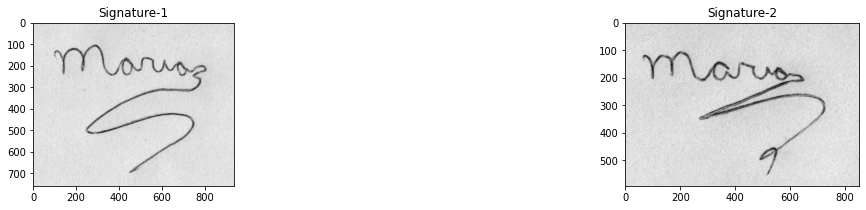

In [81]:
##Test1
img1 = './test/b1.png'
img2 = './test/b2.png'

match_sign(img1, img2)

Predicted: 0.811340928 => False


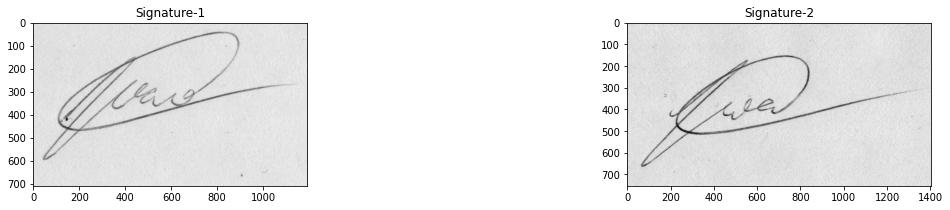

In [82]:
##Test2
img1 = './test/a1.png'
img2 = './test/a2.png'

match_sign(img1, img2)

Predicted: 0.999214649 => True


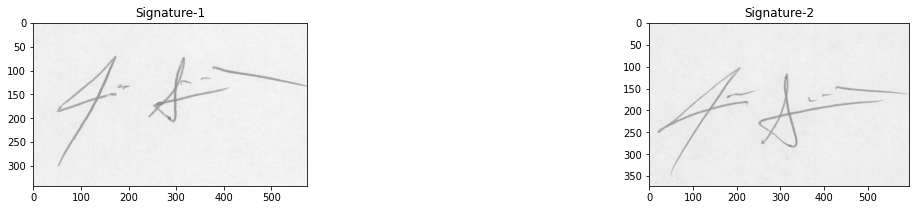

In [83]:
##Test3
img1 = './test/original_1_1.png'
img2 = './test/original_1_18.png'

match_sign(img1, img2)

Predicted: 0.108626314 => False


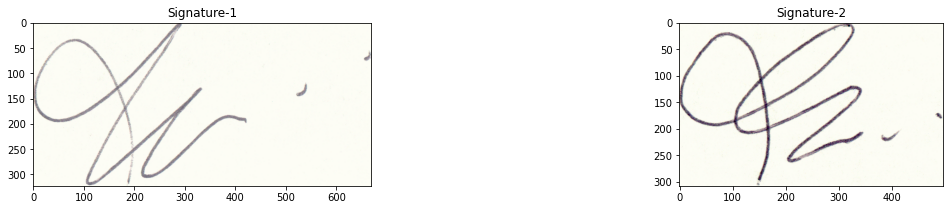

In [84]:
##Test4
img1 = "./test/01_049.png"
img2 = "./test/01_0114049.png"
match_sign(img1, img2)

Predicted: 0.305943459 => False


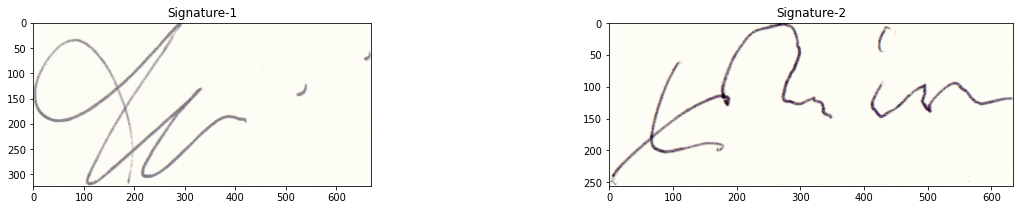

In [89]:
##Test5
img1 = './test/01_049.png'
#img2 = './test/02_049.png'
#img1 = './test/001_01.png'
img2 = './test/0119001_02.png'

match_sign(img1, img2)